<a href="https://colab.research.google.com/github/thanmayeem/Harnessing-Machine-Learning-for-Reliable-Solar-Power-Generation-Forecasting/blob/main/SVM%26RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git config --global user.email "mthanmayee74@gmail.com"
!git config --global user.name "thanmayeem"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Load and merge the datasets
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_station_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
df_solar = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_station_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Preprocess data (Example: Binary classification based on 'DAILY_YIELD')
# Convert 'DAILY_YIELD' to binary (1 if high yield, 0 if low yield)
yield_threshold = df_solar['DAILY_YIELD'].mean()  # or set a custom threshold
df_solar['HIGH_YIELD'] = np.where(df_solar['DAILY_YIELD'] >= yield_threshold, 1, 0)

# Define features and target
X = df_solar[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_solar['HIGH_YIELD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Evaluate Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60     10758
           1       0.58      0.72      0.64      9552

    accuracy                           0.62     20310
   macro avg       0.63      0.63      0.62     20310
weighted avg       0.64      0.62      0.62     20310

SVM Confusion Matrix:
 [[5749 5009]
 [2642 6910]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     10758
           1       0.84      0.88      0.86      9552

    accuracy                           0.86     20310
   macro avg       0.86      0.87      0.86     20310
weighted avg       0.87      0.86      0.86     20310

Random Forest Confusion Matrix:
 [[9195 1563]
 [1190 8362]]


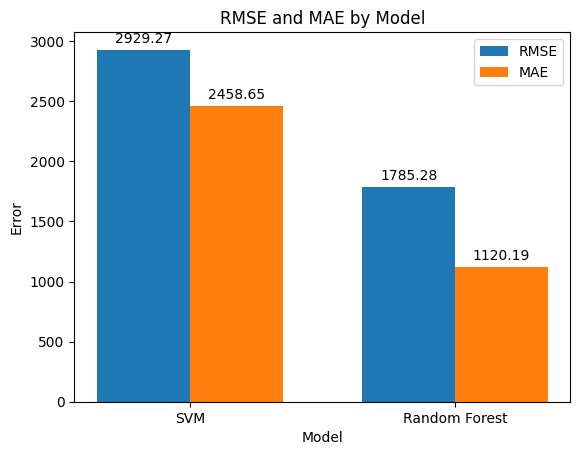

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load and merge the datasets
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_station_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
df_solar = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_station_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Define features and target for regression
X = df_solar[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_solar['DAILY_YIELD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model (for regression)
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Random Forest model (for regression)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE and MAE
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Visualization
labels = ['SVM', 'Random Forest']
rmse_values = [rmse_svm, rmse_rf]
mae_values = [mae_svm, mae_rf]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('RMSE and MAE by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


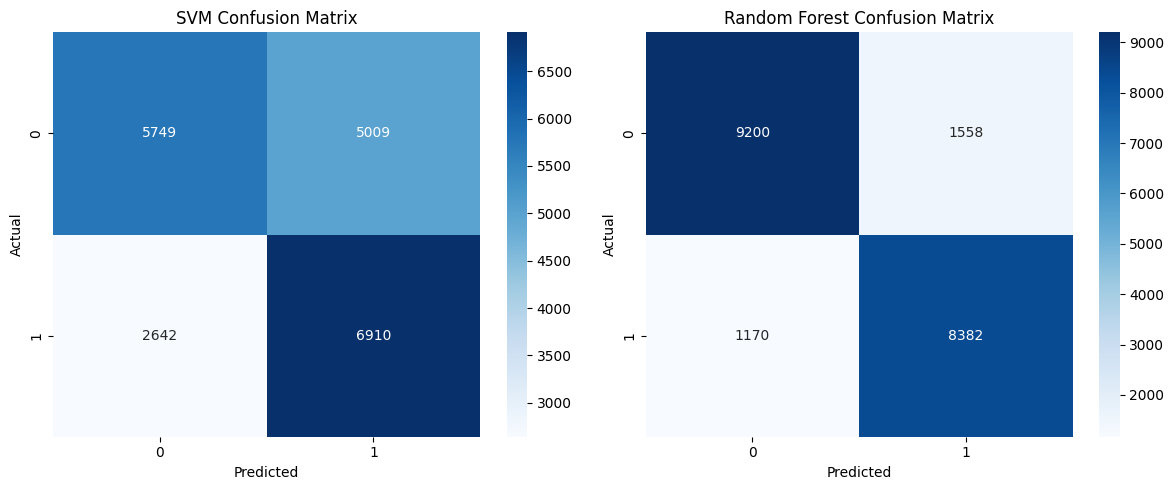

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge the datasets
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_station_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
df_solar = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_station_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Create a binary classification target based on DAILY_YIELD
yield_threshold = df_solar['DAILY_YIELD'].mean()  # or set a custom threshold
df_solar['HIGH_YIELD'] = np.where(df_solar['DAILY_YIELD'] >= yield_threshold, 1, 0)

# Define features and target
X = df_solar[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_solar['HIGH_YIELD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Generate confusion matrices
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87     10758
           1       0.84      0.87      0.86      9552

    accuracy                           0.86     20310
   macro avg       0.86      0.87      0.86     20310
weighted avg       0.87      0.86      0.87     20310



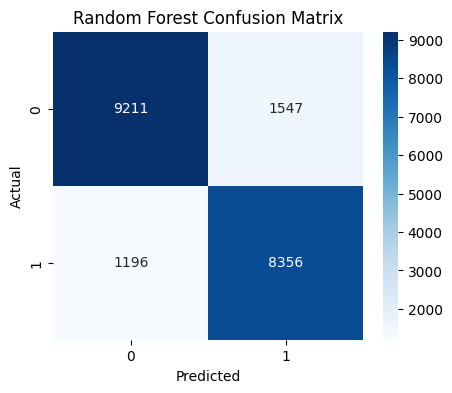

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge the datasets
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')
weather_station_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
df_solar = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_station_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Create a binary classification target based on DAILY_YIELD
yield_threshold = df_solar['DAILY_YIELD'].mean()
df_solar['HIGH_YIELD'] = (df_solar['DAILY_YIELD'] >= yield_threshold).astype(int)

# Define features and target
X = df_solar[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_solar['HIGH_YIELD']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60     10758
           1       0.58      0.72      0.64      9552

    accuracy                           0.62     20310
   macro avg       0.63      0.63      0.62     20310
weighted avg       0.64      0.62      0.62     20310



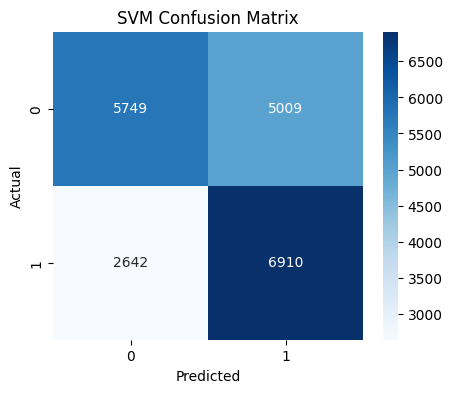

In [ ]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Stacking Model Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     10758
           1       0.83      0.91      0.87      9552

    accuracy                           0.87     20310
   macro avg       0.87      0.87      0.87     20310
weighted avg       0.87      0.87      0.87     20310



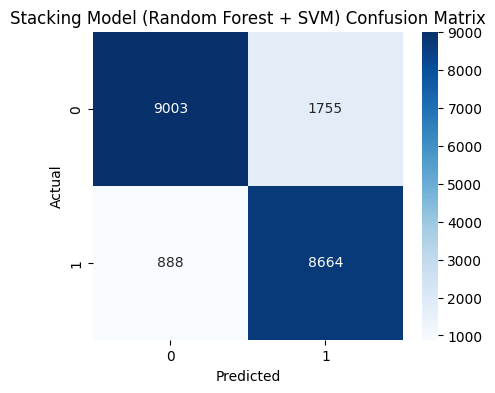

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC())
]

# Define the stacking model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=SVC())

# Train the stacking model
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)

# Evaluate Stacking Model
print("Stacking Model Classification Report:\n", classification_report(y_test, y_pred_stack))
cm_stack = confusion_matrix(y_test, y_pred_stack)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model (Random Forest + SVM) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

# Load datasets
generation_data = pd.read_csv("Plant_2_Generation_Data.csv")
weather_data = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

# Merge datasets on 'DATE_TIME' column
df_solar_sample = pd.merge(
    generation_data.drop(columns=['PLANT_ID']),
    weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
    on='DATE_TIME'
)

# Set a threshold to classify yield as high or low
yield_threshold = df_solar_sample['DAILY_YIELD'].mean()
df_solar_sample['HIGH_YIELD'] = np.where(df_solar_sample['DAILY_YIELD'] >= yield_threshold, 1, 0)

# Define features and target
X = df_solar_sample[['DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df_solar_sample['HIGH_YIELD']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = lgb_model.predict(X_test)

# Print classification report and confusion matrix
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print error metrics
print("\nLightGBM Error Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 22045, number of negative: 25343
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 47388, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.465202 -> initscore=-0.139417
[LightGBM] [Info] Start training from score -0.139417
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     10758
           1       0.81      0.82      0.81      9552

    accuracy                           0.82     20310
   macro avg       0.82      0.82      0.82     20310
weighted avg       0.82      0.82      0.82     20310

Confusion Matrix:
 [[8883 1875]
 [1767 7785]]

LightGBM Error Metrics:
Mean Squared Error (MSE): 0.1793205317577548
Root Mean Squared Error (RMSE):